In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df=df.drop('customerID', axis = 1)

### Contract

In [8]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [9]:
def contract (x):
    if x == 'Month-to-month':
        return 'month-to-month-contract'
    elif x == 'Two year':
        return 'two-year-contract'
    else:
        return 'one_year-contract'
df['Contract'] = df['Contract'].apply(contract)
# day_copy = day_copy.drop('workingday', axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,one_year-contract,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,month-to-month-contract,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,one_year-contract,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,one_year-contract,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,one_year-contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Mailed check,74.40,306.6,Yes


In [10]:
contract_dummy = pd.get_dummies(df.Contract, drop_first = True)
contract_dummy  = contract_dummy .astype(int)
contract_dummy 

,one_year-contract,two-year-contract
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


### Gender

In [11]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

Male Ratio: 0.50
Female Ratio: 0.50


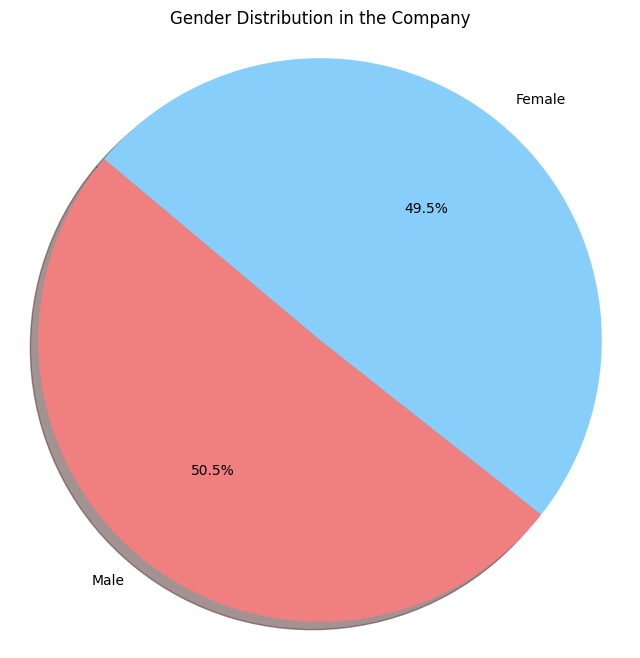

In [12]:
gender_counts = df.gender.value_counts()
male_ratio = gender_counts['Male'] / (gender_counts['Male'] + gender_counts['Female'])
female_ratio = gender_counts['Female'] / (gender_counts['Male'] + gender_counts['Female'])

print(f"Male Ratio: {male_ratio:.2f}")
print(f"Female Ratio: {female_ratio:.2f}")

plt.figure(figsize=(8, 8))
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Gender Distribution in the Company')
plt.show()

In [13]:
gender_dummy = pd.get_dummies(df.Contract, drop_first = True)
gender_dummy  = contract_dummy .astype(int)
contract_dummy 

,one_year-contract,two-year-contract
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [14]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Senior Citizens Ratio: 0.16
Others Ratio: 0.84


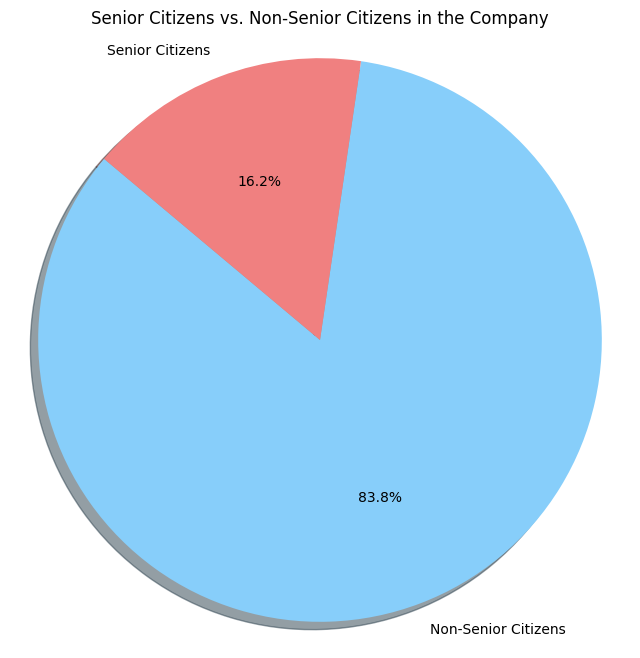

In [15]:
senior_counts = df.SeniorCitizen.value_counts()

senior_ratio = senior_counts[1] / (senior_counts[0] + senior_counts[1])
others_ratio = senior_counts[0] / (senior_counts[0] + senior_counts[1])

print(f"Senior Citizens Ratio: {senior_ratio:.2f}")
print(f"Others Ratio: {others_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['Non-Senior Citizens', 'Senior Citizens']
sizes = senior_counts.values
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Senior Citizens vs. Non-Senior Citizens in the Company')
plt.show()

In [16]:
df.Partner.value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Employees with Partners Ratio: 0.48
Employees without Partners Ratio: 0.52


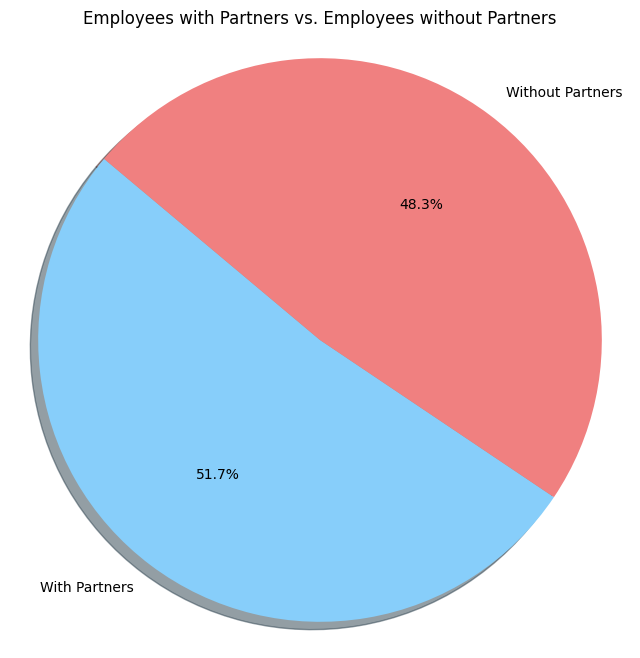

In [17]:
partner_counts = df.Partner.value_counts()
with_partner_ratio = partner_counts['Yes'] / (partner_counts['Yes'] + partner_counts['No'])
without_partner_ratio = partner_counts['No'] / (partner_counts['Yes'] + partner_counts['No'])

print(f"Employees with Partners Ratio: {with_partner_ratio:.2f}")
print(f"Employees without Partners Ratio: {without_partner_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['With Partners', 'Without Partners']
sizes = partner_counts.values
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Employees with Partners vs. Employees without Partners')
plt.show()

In [18]:
df.Dependents.value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Customers with Dependents Ratio: 0.30
Customers without Dependents Ratio: 0.70


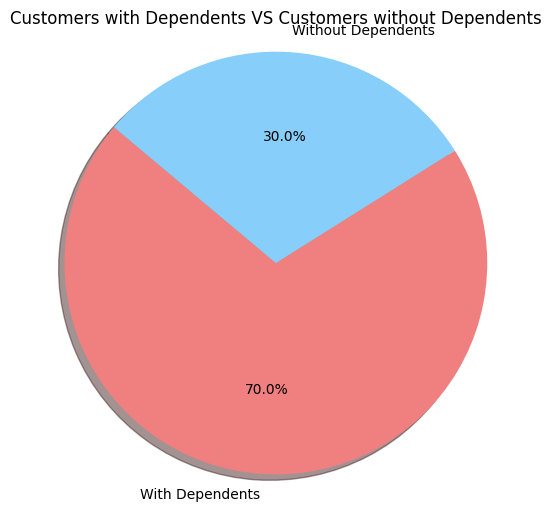

In [19]:
dependents_counts = df.Dependents.value_counts()
with_dependents_ratio = dependents_counts['Yes'] / (dependents_counts['Yes'] + dependents_counts['No'])
without_dependents_ratio = dependents_counts['No'] / (dependents_counts['Yes'] + dependents_counts['No'])
print(f"Customers with Dependents Ratio: {with_dependents_ratio:.2f}")
print(f"Customers without Dependents Ratio: {without_dependents_ratio:.2f}")
plt.figure(figsize=(6, 6))
labels = ['With Dependents', 'Without Dependents']
sizes = dependents_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Customers with Dependents VS Customers without Dependents')
plt.show()

In [20]:
df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [21]:
df.PhoneService.value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Customers with Phone Service: 0.90
Customers without Phone Service: 0.10


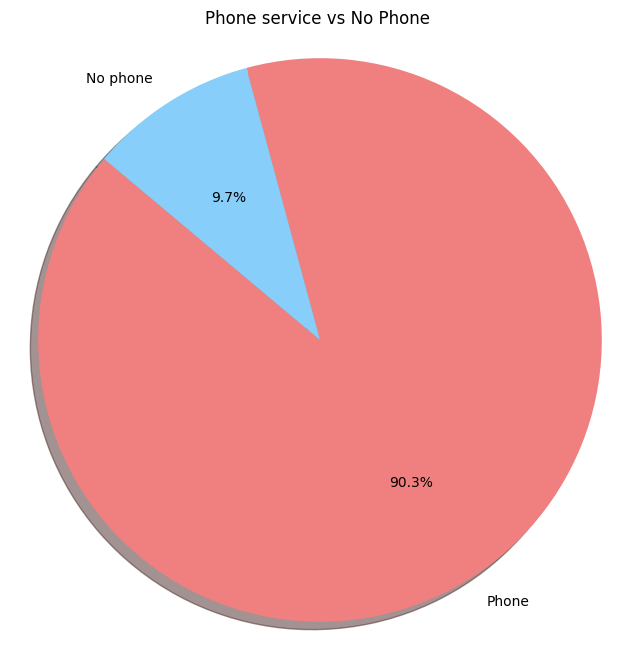

In [22]:
Phone_Service_Counts = df.PhoneService.value_counts()
with_dependents_ratio = Phone_Service_Counts['Yes'] / (Phone_Service_Counts['Yes'] + Phone_Service_Counts['No'])
without_dependents_ratio = Phone_Service_Counts['No'] / (Phone_Service_Counts['Yes'] + Phone_Service_Counts['No'])
print(f"Customers with Phone Service: {with_dependents_ratio:.2f}")
print(f"Customers without Phone Service: {without_dependents_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['Phone', 'No phone']
sizes = Phone_Service_Counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Phone service vs No Phone ')
plt.show()

In [23]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Customers with Multiple Lines: 0.47
Customers without Multiple Lines: 0.53


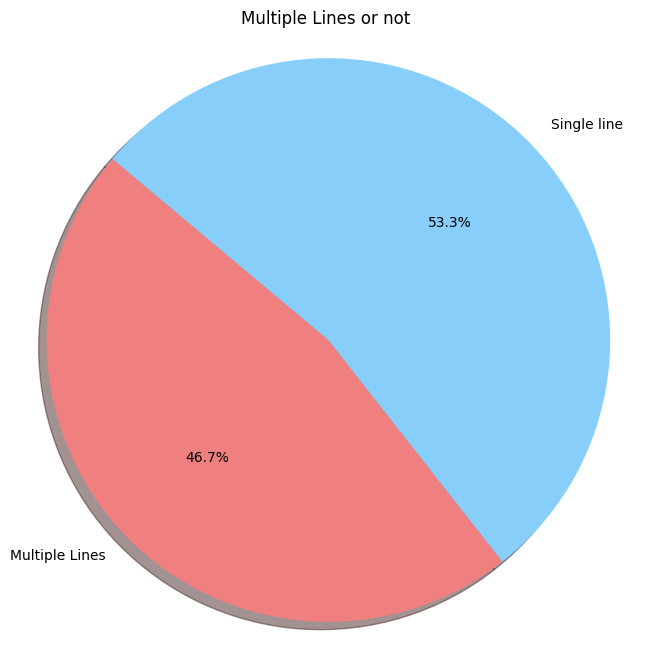

In [24]:
multiple_line_counts = df.MultipleLines.value_counts()

# Calculate ratios
with_dependents_ratio = multiple_line_counts['Yes'] / (multiple_line_counts['Yes'] + multiple_line_counts['No'])
without_dependents_ratio = multiple_line_counts['No'] / (multiple_line_counts['Yes'] + multiple_line_counts['No'])

# Print ratios
print(f"Customers with Multiple Lines: {with_dependents_ratio:.2f}")
print(f"Customers without Multiple Lines: {without_dependents_ratio:.2f}")

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['Multiple Lines', 'Single line']  # Update labels
sizes = [with_dependents_ratio, without_dependents_ratio]  # Update sizes
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Multiple Lines or not ')
plt.show()

In [25]:
df.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

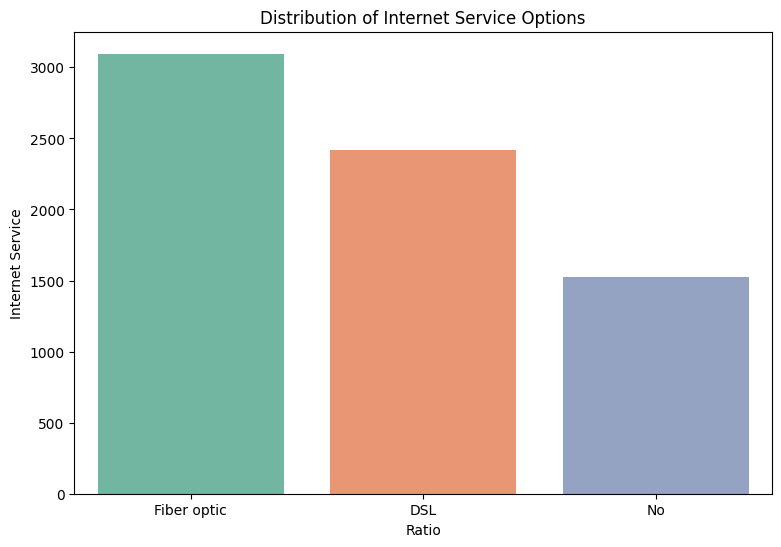

In [26]:
internet_service_counts = df.InternetService.value_counts()
plt.figure(figsize=(9, 6))
sns.barplot(y=internet_service_counts.values, x=internet_service_counts.index, palette= 'Set2')
plt.title('Distribution of Internet Service Options')
plt.xlabel('Ratio')
plt.ylabel('Internet Service')
plt.show()

In [27]:
df.OnlineBackup.value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Customers with Online Backup: 0.44
Customers without Online Backup: 0.56


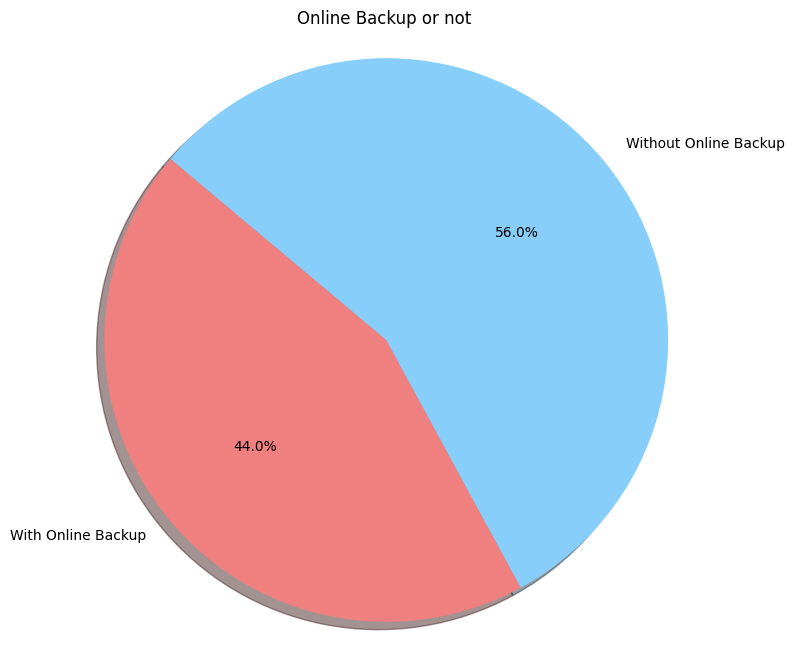

In [28]:
online_backup_counts = df.OnlineBackup.value_counts()

# Calculate ratios
with_online_backup_ratio = online_backup_counts['Yes'] / (online_backup_counts['Yes'] + online_backup_counts['No'])
without_online_backup_ratio = online_backup_counts['No'] / (online_backup_counts['Yes'] + online_backup_counts['No'])

# Print ratios
print(f"Customers with Online Backup: {with_online_backup_ratio:.2f}")
print(f"Customers without Online Backup: {without_online_backup_ratio:.2f}")

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['With Online Backup', 'Without Online Backup']  # Update labels
sizes = [with_online_backup_ratio, without_online_backup_ratio]  # Update sizes
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Online Backup or not ')
plt.show()

In [29]:
df.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

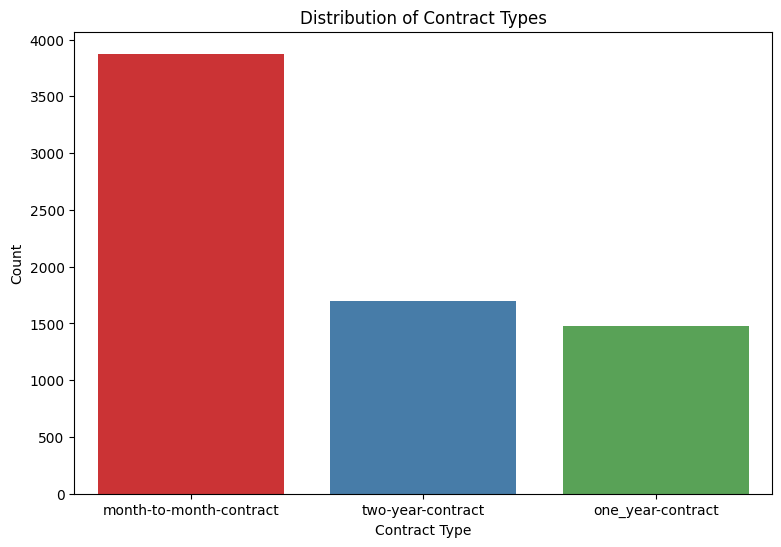

In [30]:
device_protection_counts = df.DeviceProtection.value_counts()

device_protection_counts = df.Contract.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=device_protection_counts.values, x=device_protection_counts.index, palette='Set1')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

In [31]:
df.TechSupport.value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

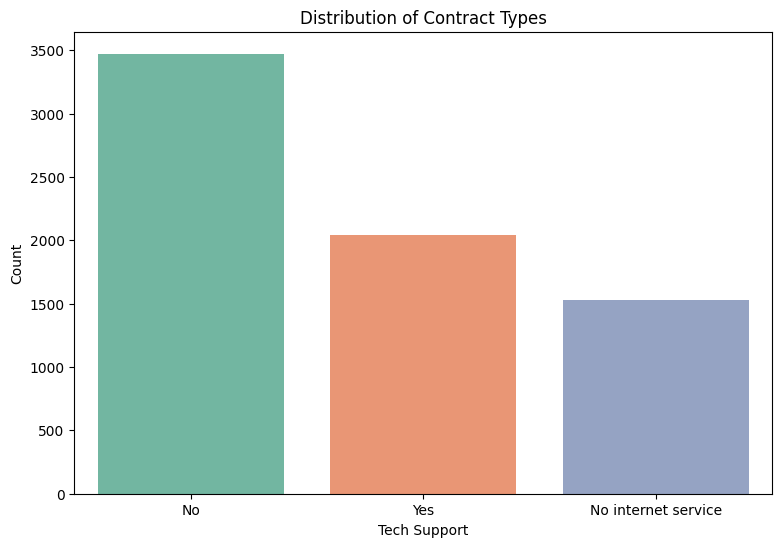

In [32]:
Texh_Support_counts = df.TechSupport.value_counts()


# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=Texh_Support_counts.values, x=Texh_Support_counts.index, palette='Set2')
plt.title('Distribution of Contract Types')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

In [33]:
df.StreamingTV.value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

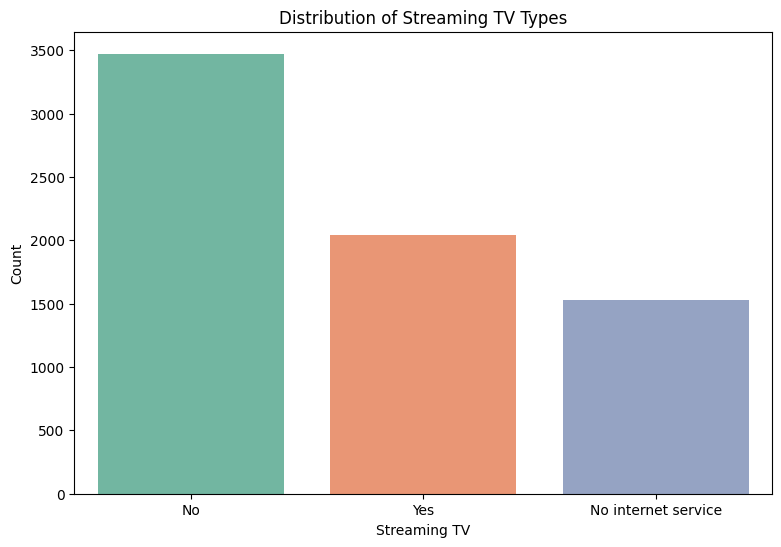

In [34]:
Streaming_Service_counts = df.TechSupport.value_counts()


# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=Streaming_Service_counts.values, x=Streaming_Service_counts.index, palette='Set2')
plt.title('Distribution of Streaming TV Types')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

In [35]:
df.StreamingMovies.value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [36]:
df.Contract.value_counts()

Contract
month-to-month-contract    3875
two-year-contract          1695
one_year-contract          1473
Name: count, dtype: int64

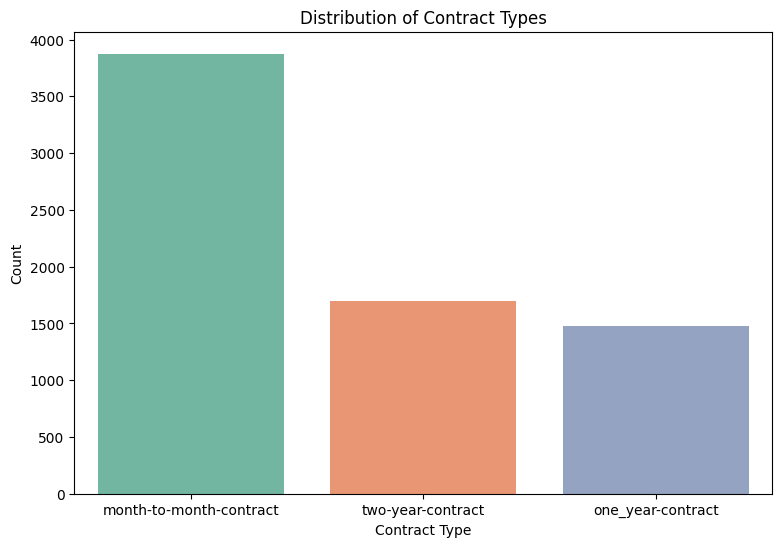

In [37]:
# Assuming df.Contract.value_counts() is provided earlier
contract_counts = df.Contract.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=contract_counts.values, x=contract_counts.index, palette='Set2')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


In [38]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

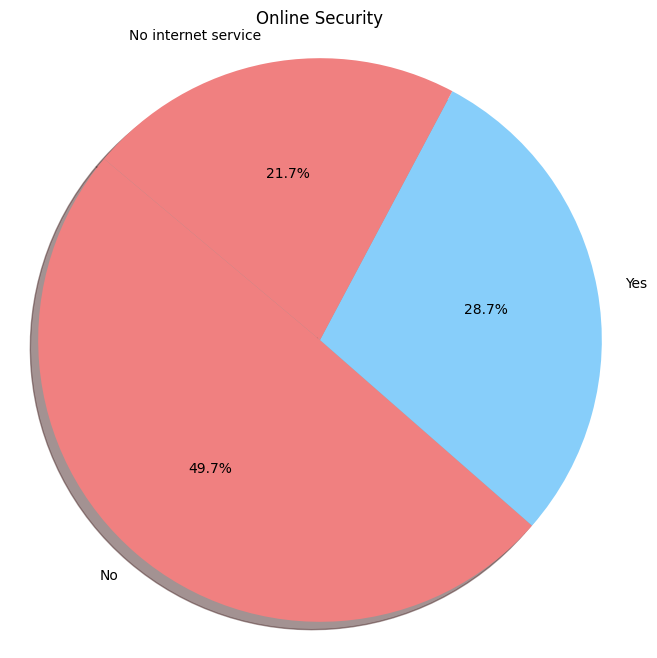

In [39]:
online_security_counts = df.OnlineSecurity.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = online_security_counts.index
sizes = online_security_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Online Security')
plt.show()

In [40]:
df.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

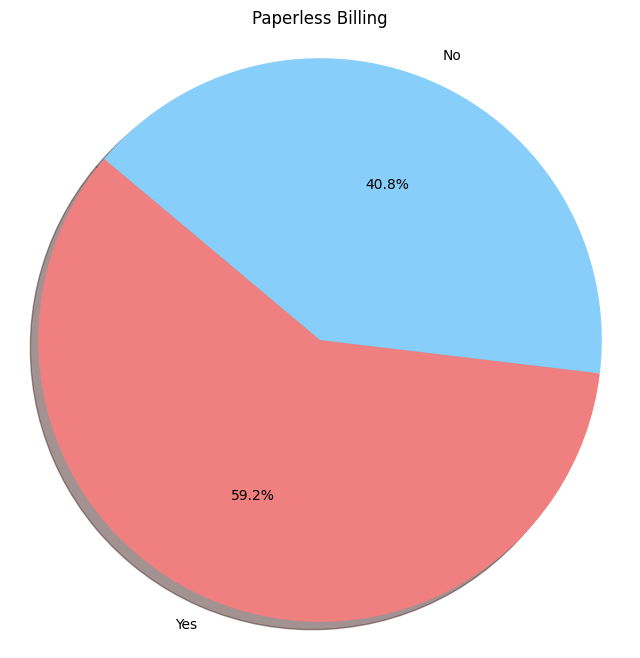

In [41]:
paperless_billing_counts = df.PaperlessBilling.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = paperless_billing_counts.index
sizes = paperless_billing_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Paperless Billing')
plt.show()

In [42]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

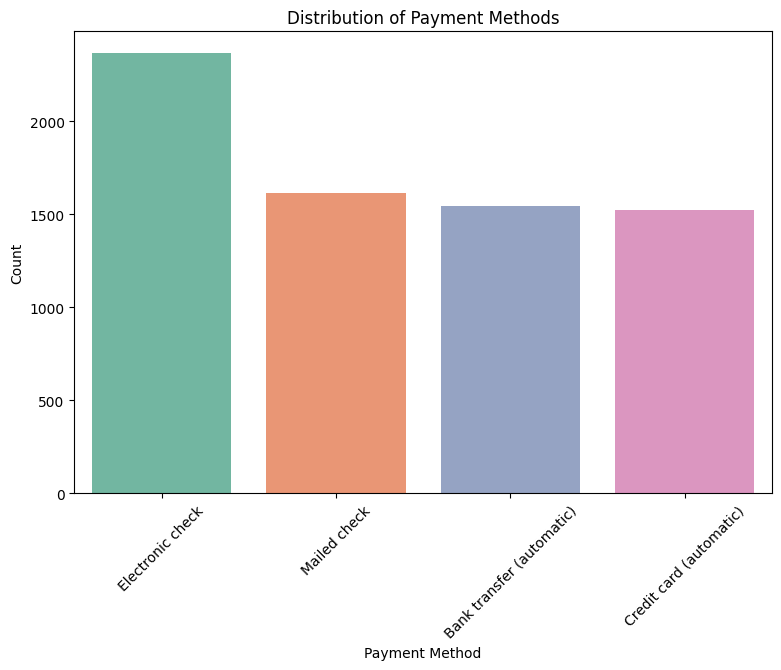

In [43]:
# Assuming df.PaymentMethod.value_counts() is provided earlier
payment_method_counts = df.PaymentMethod.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=payment_method_counts.values, x=payment_method_counts.index, palette='Set2')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [44]:
df.MonthlyCharges.value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [45]:
df.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [46]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

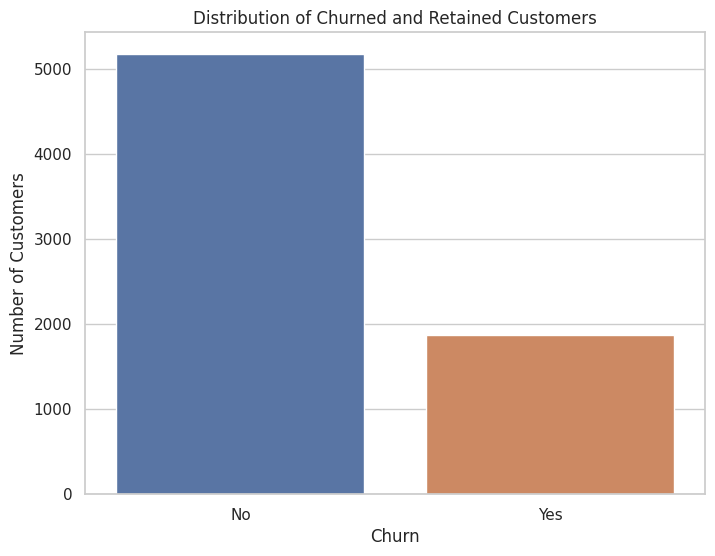

In [47]:
churn_counts = df.Churn.value_counts()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churned and Retained Customers')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

In [48]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

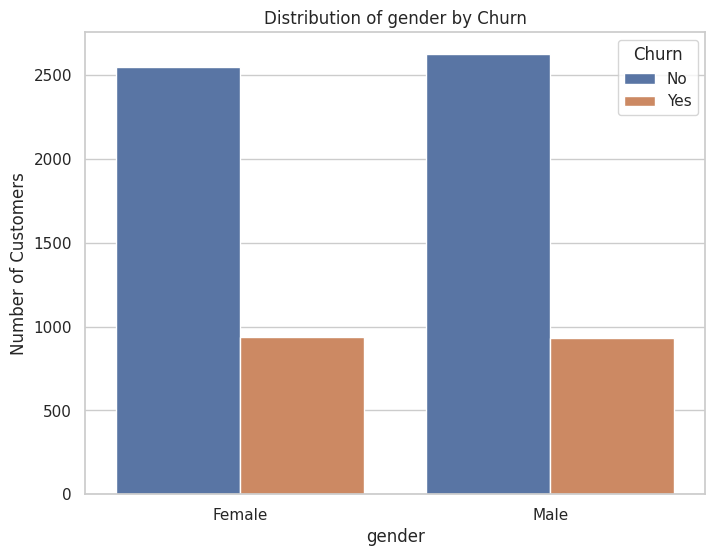

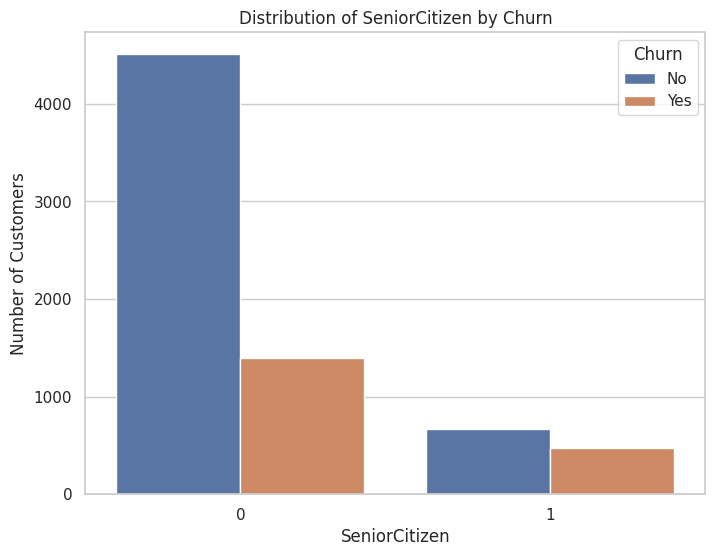

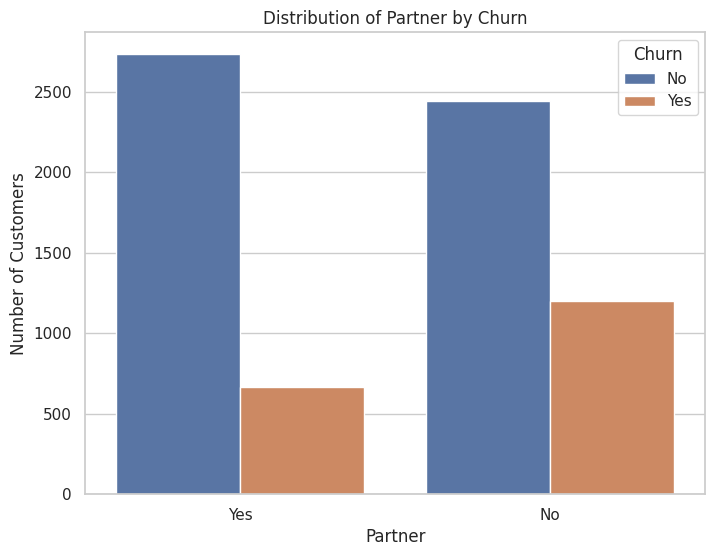

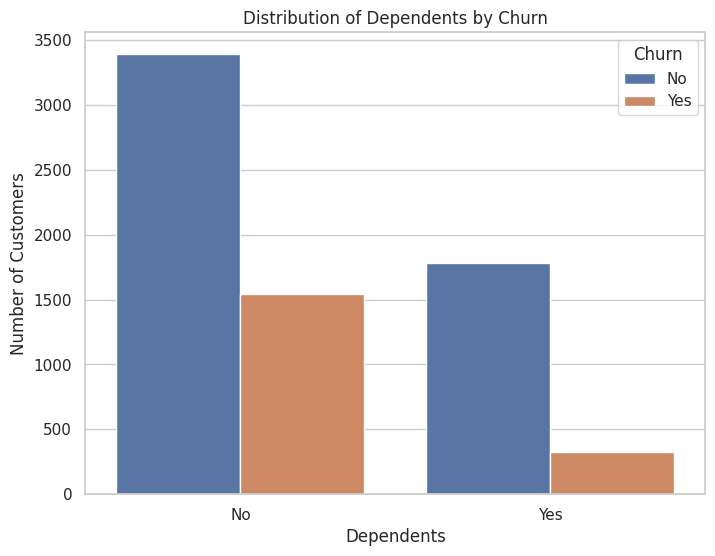

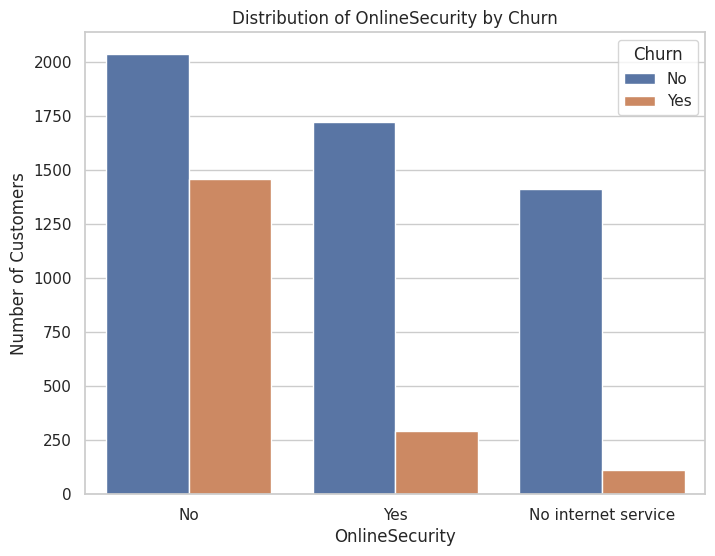

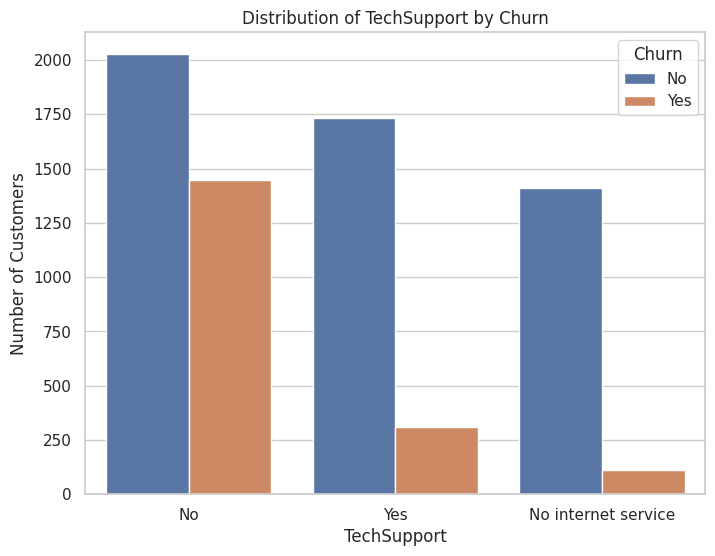

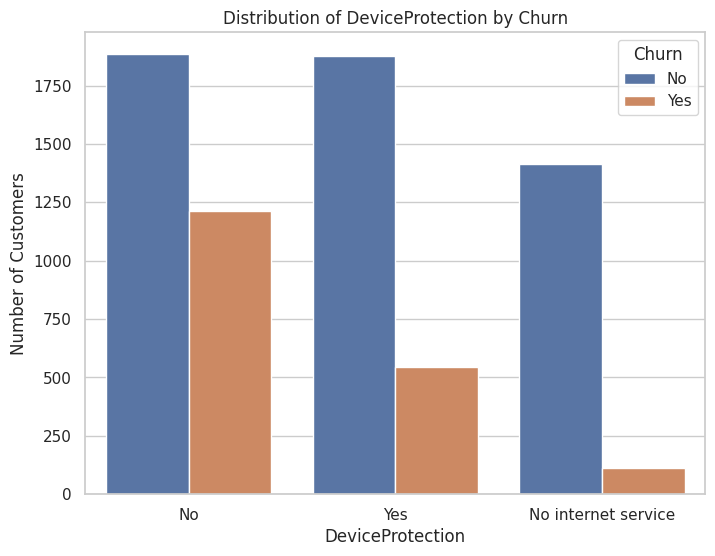

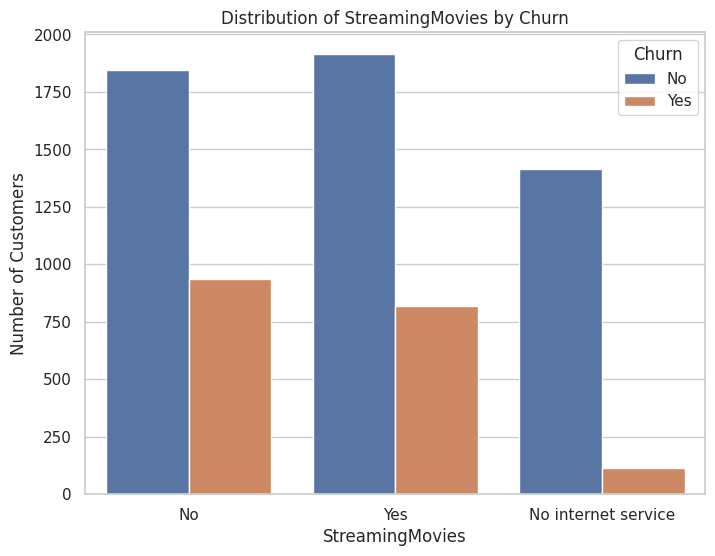

In [49]:
demographic_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','OnlineSecurity','TechSupport','DeviceProtection','StreamingMovies']

for attribute in demographic_attributes:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    sns.countplot(data=df, x=attribute, hue='Churn')
    plt.title(f'Distribution of {attribute} by Churn')
    plt.xlabel(attribute)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

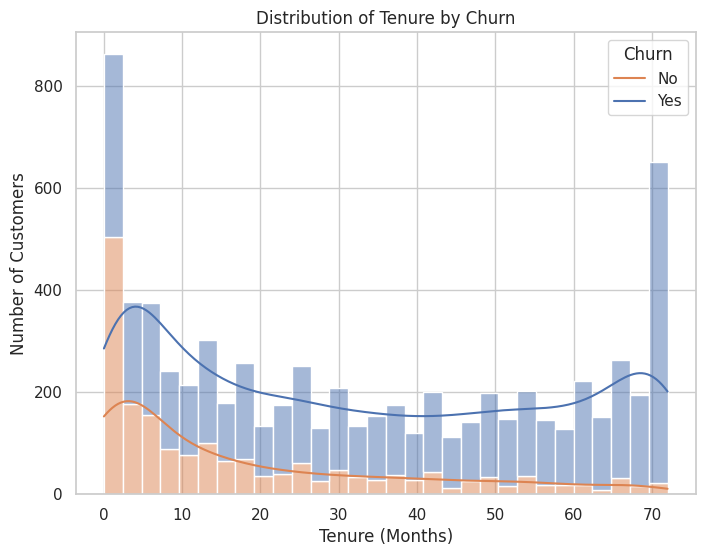

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack', kde=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()